<a href="https://colab.research.google.com/github/AudreyMuller/Recommandation_Films_1980_s/blob/Maria/Rating_per_genre_to_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#read CSV

In [2]:
df_1980_movie=pd.read_csv("/content/drive/MyDrive/2209-Data/Projets/Projet2/MMA/00_CSV_files/2022_10_25_database_AKAS_region_BASICS.csv",sep=';')

In [3]:
df_1980_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      11145 non-null  int64  
 1   tconst          11145 non-null  object 
 2   primaryTitle    11145 non-null  object 
 3   originalTitle   11145 non-null  object 
 4   startYear       11145 non-null  int64  
 5   runtimeMinutes  10561 non-null  float64
 6   genres          11145 non-null  object 
 7   region          11145 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 696.7+ KB


In [9]:
df_Rating=pd.read_csv("https://datasets.imdbws.com/title.ratings.tsv.gz",sep='\t')

#Keep 'Tconst' in Ratings that also in the 1980's Movies CSV

In [10]:
df_Rating=df_Rating[df_Rating['tconst'].isin(df_1980_movie['tconst'])]

#Merge the 2 Dataframe.
To add the averagerating & nomVote in the 1980's Movies CSV

In [11]:
df_movie_1980_rating=df_1980_movie.merge(df_Rating, on='tconst',how='left')

In [12]:
df_movie_1980_rating

,Unnamed: 0,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,region,averageRating,numVotes
0,0,tt0036606,"Another Time, Another Place","Another Time, Another Place",1983,118.0,"['Drama', 'War']",US,6.5,326.0
1,1,tt0038687,Let There Be Light,Let There Be Light,1980,58.0,"['Documentary', 'War']",US,7.5,1893.0
2,2,tt0062181,Rece do góry,Rece do góry,1981,76.0,['Drama'],FR,6.6,357.0
3,3,tt0064820,The Plot Against Harry,The Plot Against Harry,1989,81.0,"['Comedy', 'Crime']",US,6.9,334.0
4,4,tt0065530,Le cercle des passions,Le cercle des passions,1983,108.0,['Drama'],FR,6.8,56.0
...,...,...,...,...,...,...,...,...,...,...
11140,11140,tt9828802,Vaya luna de miel,Vaya luna de miel,1980,93.0,"['Adventure', 'Comedy']",US,5.9,53.0
11141,11141,tt9843632,We Didn't Know Love During First Love,"Chu lian shi, wo men bu dong ai qing",1987,98.0,"['Drama', 'Romance']",US,NaN,NaN
11142,11142,tt9844604,Séduction,Séduction,1984,70.0,['Drama'],FR,NaN,NaN
11143,11143,tt9855210,An Actress' Dream,Yi ge nü yan yuan de meng,1985,91.0,"['Crime', 'Drama']",US,7.8,5.0


In [13]:
df_movie_1980_rating.drop(df_movie_1980_rating.filter(regex="Unname"),axis=1, inplace=True)

In [14]:
# determine the top rated movie (by averageRating) for each genre
df_movie_1980_rating.sort_values('averageRating', ascending=False).groupby('genres')['primaryTitle','averageRating'].first()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,primaryTitle,averageRating
genres,,
"['Action', 'Adventure', 'Animation']",Macross: Do You Remember Love?,7.7
"['Action', 'Adventure', 'Biography']",Caligula and Messalina,3.5
"['Action', 'Adventure', 'Comedy']",The Blues Brothers,7.9
"['Action', 'Adventure', 'Crime']",Shaan,7.1
"['Action', 'Adventure', 'Drama']",Kamen Rider (Skyrider): Eight Riders vs. Galax...,7.4
...,...,...
"['Sci-Fi', 'Thriller']",The War of the Worlds: Next Century,6.9
"['Sci-Fi', 'Western']",Alien Outlaw,3.0
['Sci-Fi'],Edgar Allan Poe's Plan 13: The House of Elvis,8.9


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f933e55f090>,
      dtype=object)

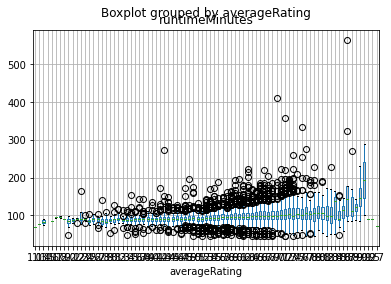

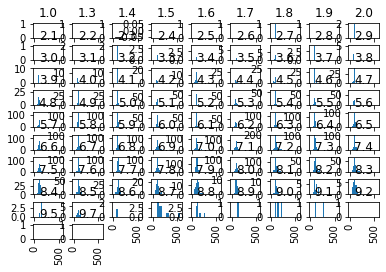

In [37]:
# visualize the relationship between averageRating and runtimeMinutes
df_movie_1980_rating.boxplot(column='runtimeMinutes', by='averageRating')
df_movie_1980_rating.runtimeMinutes.hist(by=df_movie_1980_rating.averageRating, sharex=True)

In [31]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies
genre_counts = df_movie_1980_rating.genres.value_counts()
top_genres = genre_counts[genre_counts >= 10].index
df_movie_1980_rating[df_movie_1980_rating.genres.isin(top_genres)].groupby('genres').averageRating.mean()


genres
['Action', 'Adventure', 'Animation']    6.417857
['Action', 'Adventure', 'Comedy']       5.530263
['Action', 'Adventure', 'Crime']        5.391176
['Action', 'Adventure', 'Drama']        5.300000
['Action', 'Adventure', 'Fantasy']      5.080435
                                          ...   
['Romance']                             5.815789
['Sci-Fi', 'Thriller']                  5.129412
['Sci-Fi']                              5.105128
['Thriller']                            5.179231
['War']                                 5.704762
Name: averageRating, Length: 151, dtype: float64

In [32]:
#calculate the average star rating for all genres, then filter using a boolean Series
df_movie_1980_rating.groupby('genres').averageRating.mean()[df_movie_1980_rating.genres.value_counts() >= 10]

genres
['Action', 'Adventure', 'Animation']    6.417857
['Action', 'Adventure', 'Comedy']       5.530263
['Action', 'Adventure', 'Crime']        5.391176
['Action', 'Adventure', 'Drama']        5.300000
['Action', 'Adventure', 'Fantasy']      5.080435
                                          ...   
['Romance']                             5.815789
['Sci-Fi', 'Thriller']                  5.129412
['Sci-Fi']                              5.105128
['Thriller']                            5.179231
['War']                                 5.704762
Name: averageRating, Length: 151, dtype: float64

In [28]:
# determine the top rated movie (by star rating) for each genre

df_movie_1980_rating.sort_values('averageRating', ascending=False).groupby('genres').primaryTitle.first()
df_movie_1980_rating.groupby('genres').primaryTitle.first() 

genres
['Action', 'Adventure', 'Animation']                           Queen Millennia
['Action', 'Adventure', 'Biography']                    Caligula and Messalina
['Action', 'Adventure', 'Comedy']                        Fantasy Mission Force
['Action', 'Adventure', 'Crime']                                   Cabo Blanco
['Action', 'Adventure', 'Drama']                            Tennessee Stallion
                                                         ...                  
['Sci-Fi', 'Thriller']                                      Image of the Beast
['Sci-Fi', 'Western']                                             Alien Outlaw
['Sci-Fi']                                                Music of the Spheres
['Thriller']                            Two Female Spies with Flowered Panties
['War']                                            Treasure of the Lost Desert
Name: primaryTitle, Length: 494, dtype: object

#export CSV